## Import library

In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, Dropout, Flatten, Dense
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras.models import Sequential
import cv2
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


## load data

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

## visualize

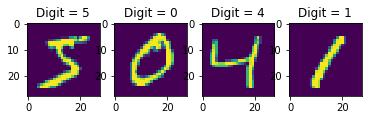

In [3]:
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(x_train[i])
    plt.title("Digit = "+str(y_train[i]))
plt.show()    

## normalize

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

x_train =x_train/ 255
x_test = x_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

number_of_classes = y_train.shape[1]

#number_of_classes
x_train.shape

(60000, 28, 28, 1)

## make model

In [ ]:
def baseline_model():
    #create model
    model = Sequential()
    model.add(Conv2D(32,(5,5),input_shape= (28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(number_of_classes,activation='softmax'))
    #compile model
    model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
    #model.summary()
    return model

## evaluate

In [ ]:
model = baseline_model()

model.fit(x_train,y_train,validation_data =(x_test,y_test),epochs = 10,batch_size = 200,verbose=2)

scores = model.evaluate(x_test,y_test,verbose = 0)

print("CNN error = %0.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 38s - loss: 0.2335 - acc: 0.9339 - val_loss: 0.0748 - val_acc: 0.9765
Epoch 2/10
 - 37s - loss: 0.0684 - acc: 0.9801 - val_loss: 0.0585 - val_acc: 0.9811
Epoch 3/10
 - 41s - loss: 0.0493 - acc: 0.9848 - val_loss: 0.0386 - val_acc: 0.9872
Epoch 4/10


In [ ]:
scores